In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import warnings

In [2]:
warnings.filterwarnings('ignore')

In [3]:
data= pd.read_csv('Restaurant_Reviews.tsv',sep= '\t')

In [4]:
data.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


1 = positive review

0 = negitive review

In [5]:
data.shape

(1000, 2)

In [6]:
#missing values 

data.isnull().sum()

Review    0
Liked     0
dtype: int64

In [7]:
#see the balance of the data 

data['Liked'].value_counts()

#data is highly balanced

1    500
0    500
Name: Liked, dtype: int64

In [8]:
#making a new column that will count the character  

data['char_counts'] = data['Review'].apply(len)

In [9]:
data.head()

,Review,Liked,char_counts
0,Wow... Loved this place.,1,24
1,Crust is not good.,0,18
2,Not tasty and the texture was just nasty.,0,41
3,Stopped by during the late May bank holiday of...,1,87
4,The selection on the menu was great and so wer...,1,59


In [10]:
#word count 

data['word_count'] = data['Review'].apply(lambda x :len(str(x).split()))

In [11]:
data.head()

,Review,Liked,char_counts,word_count
0,Wow... Loved this place.,1,24,4
1,Crust is not good.,0,18,4
2,Not tasty and the texture was just nasty.,0,41,8
3,Stopped by during the late May bank holiday of...,1,87,15
4,The selection on the menu was great and so wer...,1,59,12


In [12]:
import nltk


In [13]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sanya\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [14]:
#sentence count 

data['sent_count'] = data['Review'].apply(lambda x: len(nltk.sent_tokenize(str(x))))


In [15]:
data.head()

,Review,Liked,char_counts,word_count,sent_count
0,Wow... Loved this place.,1,24,4,2
1,Crust is not good.,0,18,4,1
2,Not tasty and the texture was just nasty.,0,41,8,1
3,Stopped by during the late May bank holiday of...,1,87,15,1
4,The selection on the menu was great and so wer...,1,59,12,1


In [16]:
#average character count 

data[data['Liked']== 1]['char_counts'].mean()

55.88

In [17]:
data[data['Liked']== 0]['char_counts'].mean()

60.75

In [18]:
#import re for regular expression 

import re

In [19]:
review = re.sub('[^a-zA-Z]',' ',data['Review'][1])

In [20]:
review

'Crust is not good '

In [21]:
 review= review.lower()

In [22]:
review

'crust is not good '

In [23]:
review = review.split()

In [24]:
review

['crust', 'is', 'not', 'good']

## Let's remove stop words 

In [25]:
from nltk.corpus import stopwords

In [26]:
all_stopwords = stopwords.words('english')
all_stopwords.remove('not')

In [27]:
all_stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [28]:
review = [word  for word in review  if word not in set(all_stopwords)]

In [29]:
review

['crust', 'not', 'good']

## Stemming 

In [30]:
from nltk.stem.porter import  PorterStemmer

In [31]:
ps = PorterStemmer()

In [32]:
review = [ps.stem(word) for word in review]

In [33]:
review = ' '.join(review)

In [34]:
review

'crust not good'

In [35]:
import re
custom_stopwords = {'don', "don't", 'ain', 'aren', "aren't", 'couldn', "couldn't",
                    'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't",
                    'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't",
                    'needn', "needn't", 'shan', "shan't", 'no', 'nor', 'not', 'shouldn', "shouldn't",
                    'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"}

corpus =[]
ps =PorterStemmer()
stop_words = set(stopwords.words("english")) - custom_stopwords

for i in range(len(data)):
    review = re.sub('[^a-zA-Z]',' ',data['Review'][i])
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if word not in stop_words]
    review = " ".join(review)
    corpus.append(review)

In [36]:
data['processed_text'] =corpus

In [37]:
data.head()

,Review,Liked,char_counts,word_count,sent_count,processed_text
0,Wow... Loved this place.,1,24,4,2,wow love place
1,Crust is not good.,0,18,4,1,crust not good
2,Not tasty and the texture was just nasty.,0,41,8,1,not tasti textur nasti
3,Stopped by during the late May bank holiday of...,1,87,15,1,stop late may bank holiday rick steve recommen...
4,The selection on the menu was great and so wer...,1,59,12,1,select menu great price


In [38]:
from wordcloud import WordCloud

In [39]:
wc = WordCloud(width=1000,height=700,min_font_size=8,background_color='white')

In [40]:
#for positive  comments

pos = wc.generate(data[data['Liked']==1]['processed_text'].str.cat(sep =''))

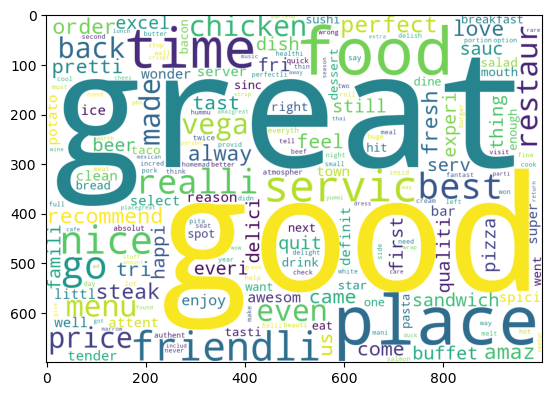

In [41]:
plt.imshow(pos)

In [42]:
# for negitive comments 

negative = wc.generate(data[data['Liked']==0]['processed_text'].str.cat(sep =''))

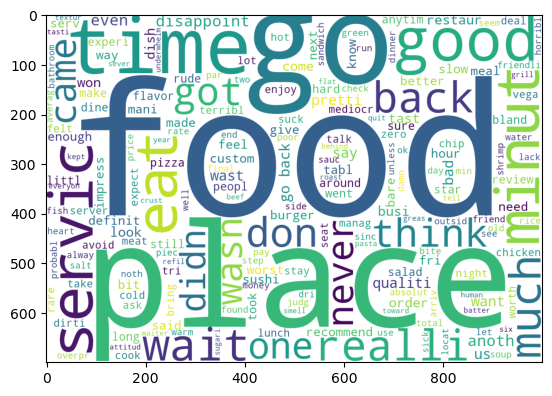

In [43]:
plt.imshow(negative)

In [44]:
#now with the use of count_vectorizer we are converting the text into numbers 

from sklearn.feature_extraction.text import CountVectorizer

In [45]:
#lower the number of features greater will be the prediction
cv = CountVectorizer(max_features=1500)

In [46]:
cv.fit_transform(corpus)

<1000x1500 sparse matrix of type '<class 'numpy.int64'>'
	with 5514 stored elements in Compressed Sparse Row format>

In [47]:
X = cv.fit_transform(corpus).toarray()

In [48]:
#independent variable 
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [49]:

X.shape

(1000, 1500)

In [50]:
#dependent variable 
y = data['Liked']

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [53]:
from sklearn.naive_bayes import GaussianNB
nb =GaussianNB()
nb.fit(X_train,y_train)
y_pred = nb.predict(X_test)

In [54]:
from sklearn.metrics import accuracy_score

In [55]:
accuracy_score(y_test,y_pred)

0.68

In [56]:
from sklearn.linear_model import LogisticRegression
lr =LogisticRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
accuracy_score(y_test,y_pred)

0.79

In [57]:
from sklearn.ensemble import RandomForestClassifier
rf =RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.79

In [58]:
import joblib

In [59]:
joblib.dump(rf,'Restaurant_review_model')
joblib.dump(cv,"count_v_res")

['count_v_res']

In [ ]:
import tkinter as tk
from tkinter import ttk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
import joblib
import re

class RestaurantReviewApp:
    def __init__(self, master):
        self.master = master
        master.title("Restaurant Review Classification App")
        master.geometry("400x300")  # Set a custom size for the window

        # Load your pre-trained Random Forest model and CountVectorizer
        # Replace 'your_model.pkl' and 'your_vectorizer.pkl' with the actual filenames
        self.model = joblib.load('Restaurant_review_model')
        self.vectorizer = joblib.load('count_v_res')

        # Create and set up widgets
        title_font = ('Helvetica', 16, 'bold')  # Larger font for the title
        self.label = ttk.Label(master, text="Enter your restaurant review:", font=title_font)
        self.label.pack(pady=10)

        self.text_entry = tk.Text(master, height=5, width=40)
        self.text_entry.pack(pady=10)

        # Increase button size and change color on press
        self.classify_button = ttk.Button(master, text="Classify", command=self.classify_review, style='Custom.TButton')
        self.classify_button.pack(pady=10)

        self.result_label = ttk.Label(master, text="")
        self.result_label.pack(pady=10)

        # Style configuration for the button
        self.style = ttk.Style()
        self.style.configure('Custom.TButton', font=('Helvetica', 12), width=15, foreground='black', background='#4CAF50', padding=(10, 5))
        self.style.map('Custom.TButton', foreground=[('pressed', 'black'), ('active', 'white')], background=[('pressed', '!disabled', '#45a049'), ('active', '#4CAF50')])

    def preprocess_text(self, text):
        custom_stopwords = {'don', "don't", 'ain', 'aren', "aren't", 'couldn', "couldn't",
                            'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't",
                            'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't",
                            'needn', "needn't", 'shan', "shan't", 'no', 'nor', 'not', 'shouldn', "shouldn't",
                            'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"}
        ps = PorterStemmer()
        stop_words = set(stopwords.words("english")) - custom_stopwords

        review = re.sub('[^a-zA-Z]', ' ', text)
        review = review.lower()
        review = review.split()
        review = [ps.stem(word) for word in review if word not in stop_words]
        review = " ".join(review)

        return review

    def classify_review(self):
        user_input = self.text_entry.get("1.0", "end-1c")
        if user_input:
            processed_input = self.preprocess_text(user_input)
            # Transform the processed_input using the CountVectorizer
            processed_input_vectorized = self.vectorizer.transform([processed_input])
            prediction = self.model.predict(processed_input_vectorized)[0]
            sentiment = "Positive" if prediction == 1 else "Negative"
            self.result_label.config(text=f"Predicted Sentiment: {sentiment}")
        else:
            self.result_label.config(text="Please enter a review before clicking 'Classify'.")

if __name__ == "__main__":
    root = tk.Tk()
    app = RestaurantReviewApp(root)
    root.mainloop()
 